In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [15]:
data_frame=pd.read_csv("power_plant1.csv")
data_frame.head()


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [16]:
#Checking if there is any null value in the dataset
data_frame.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [17]:
data_frame.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


<AxesSubplot:>

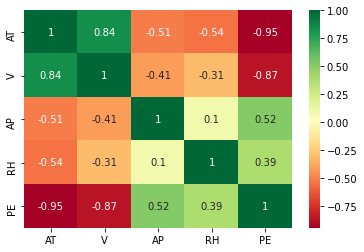

In [18]:
#Visualising data through heat map
features=data_frame.corr()
sns.heatmap(features, annot=True,cmap="RdYlGn" )

#According to colour intensity and value it seems that output energy is most realted to AT(ambient temperature) 

In [19]:
#Splitting features and target
x=data_frame.drop(columns=["PE"])
y=data_frame["PE"]

from sklearn.model_selection import train_test_split

#Splitting data into testing and training data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(x.shape,"\nTraining data ->" ,x_train.shape,"\nTesting data ->" ,x_test.shape)


(9568, 4) 
Training data -> (7654, 4) 
Testing data -> (1914, 4)


In [20]:
#Model training
from sklearn.linear_model import LinearRegression
from sklearn import metrics

model=LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [21]:
#prediction on training data
predicted_train=model.predict(x_train)

#R squared value
r2_train=metrics.r2_score(y_train,predicted_train)
print(r2_train)

0.9287176107670659


In [22]:
#prediction on test data
predicted_test=model.predict(x_test)

#R squared value
r2_test=metrics.r2_score(y_test,predicted_test)
print(r2_test)

0.9285478474402592


In [23]:
#Building a predictive system
input_data=(9.48,44.71,1019.12,66.43)

#converting tupple into array for better calculations
input_data_as_numpy_array=np.asarray(input_data)


#Reshaping array-> to predict output for only one data point
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print("Energy output is ",prediction)

Energy output is  [478.0859569]
